In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('data/train_data.csv')

In [3]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,97,9.439964,915.676497,Premium,Electronic check,No,Movies,No,Mobile,1.070203,...,38,Fantasy,2.708455,2,Male,20,No,No,NAH0SBPY6R,0
1,17,17.516151,297.774573,Basic,Credit card,Yes,TV Shows,Yes,TV,28.608150,...,0,Drama,1.941541,8,Male,7,No,No,ZZZ79N8FD7,0
2,87,14.587940,1269.150817,Standard,Mailed check,No,Movies,Yes,Computer,18.069222,...,6,Comedy,3.342307,9,Male,17,No,No,TWGCSF4J5W,1
3,71,17.084931,1213.030117,Basic,Electronic check,No,Movies,Yes,TV,37.172893,...,44,Fantasy,1.005987,9,Female,16,Yes,No,4DGYDLAEMU,0
4,5,8.066265,40.331323,Premium,Bank transfer,Yes,TV Shows,No,Tablet,36.223576,...,4,Fantasy,4.534191,3,Female,2,Yes,Yes,WUFODXOMUD,1


In [4]:
df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231597 entries, 0 to 231596
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                231597 non-null  int64  
 1   MonthlyCharges            231597 non-null  float64
 2   TotalCharges              231597 non-null  float64
 3   SubscriptionType          231597 non-null  object 
 4   PaymentMethod             231597 non-null  object 
 5   PaperlessBilling          231597 non-null  object 
 6   ContentType               231597 non-null  object 
 7   MultiDeviceAccess         231597 non-null  object 
 8   DeviceRegistered          231597 non-null  object 
 9   ViewingHoursPerWeek       231597 non-null  float64
 10  AverageViewingDuration    231597 non-null  float64
 11  ContentDownloadsPerMonth  231597 non-null  int64  
 12  GenrePreference           231597 non-null  object 
 13  UserRating                231597 non-null  f

In [6]:
cat_col = df.select_dtypes(exclude='object').columns

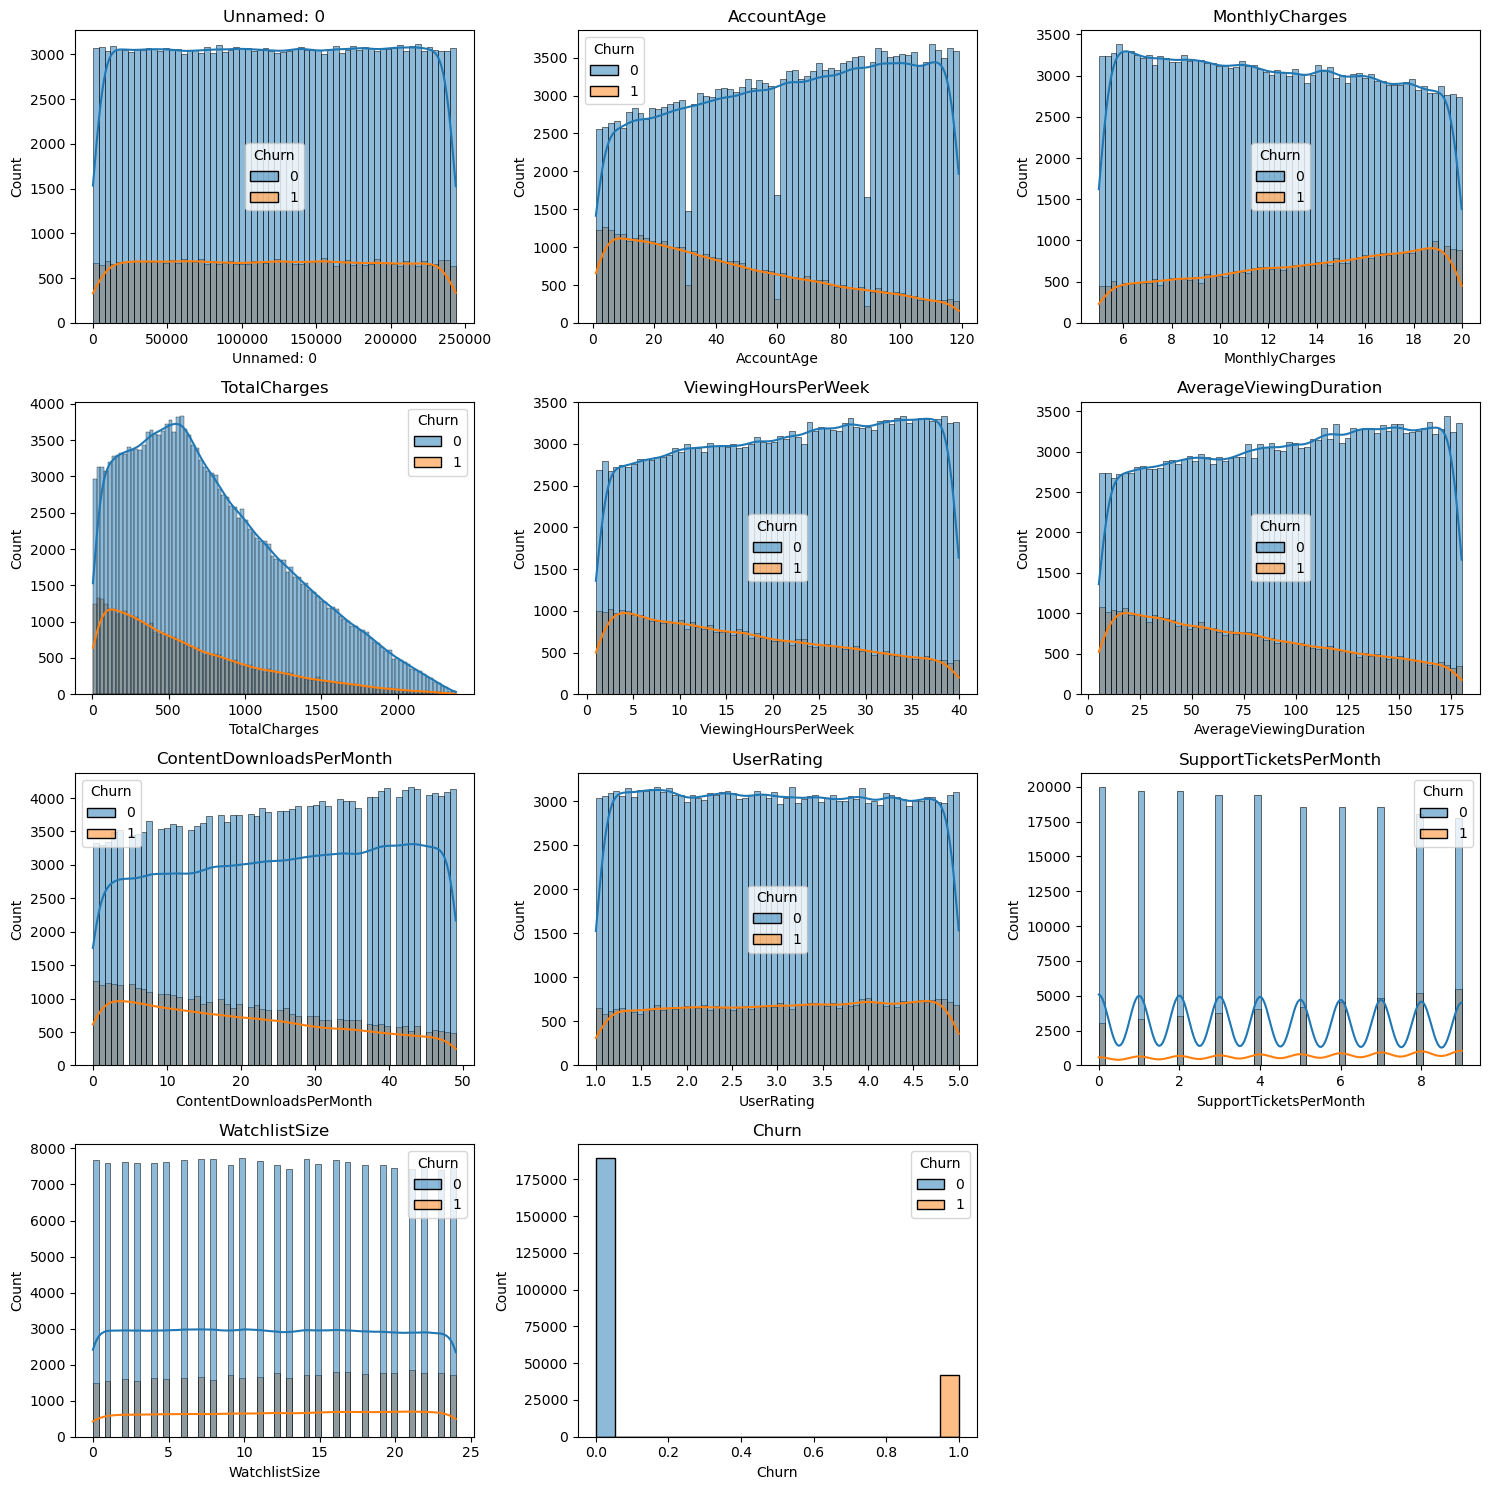

In [7]:
plt.figure(figsize=(15,15))
for i,j in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.histplot(df,x=j,hue='Churn',kde=True)
    plt.title(j)

plt.tight_layout()

In [8]:
# plt.figure(figsize=(15,15))
# for i,j in enumerate(df.select_dtypes(include='object').columns):
#     plt.subplot(3,4,i+1)
#     sns.countplot(df,x=j,hue='Churn')
#     plt.title(j)

# plt.tight_layout()

In [9]:
len(df.select_dtypes(include='object').columns)

11

# preprocessing

In [7]:
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,97,9.439964,915.676497,Premium,Electronic check,No,Movies,No,Mobile,1.070203,...,38,Fantasy,2.708455,2,Male,20,No,No,NAH0SBPY6R,0
1,17,17.516151,297.774573,Basic,Credit card,Yes,TV Shows,Yes,TV,28.608150,...,0,Drama,1.941541,8,Male,7,No,No,ZZZ79N8FD7,0
2,87,14.587940,1269.150817,Standard,Mailed check,No,Movies,Yes,Computer,18.069222,...,6,Comedy,3.342307,9,Male,17,No,No,TWGCSF4J5W,1
3,71,17.084931,1213.030117,Basic,Electronic check,No,Movies,Yes,TV,37.172893,...,44,Fantasy,1.005987,9,Female,16,Yes,No,4DGYDLAEMU,0
4,5,8.066265,40.331323,Premium,Bank transfer,Yes,TV Shows,No,Tablet,36.223576,...,4,Fantasy,4.534191,3,Female,2,Yes,Yes,WUFODXOMUD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231592,19,15.405043,292.695821,Standard,Bank transfer,Yes,TV Shows,Yes,TV,38.482146,...,16,Sci-Fi,1.130335,9,Male,2,Yes,No,7S9E0Q7DJS,0
231593,17,5.396102,91.733728,Basic,Electronic check,No,Both,No,TV,26.636372,...,25,Fantasy,3.556736,8,Male,4,No,Yes,N6MJZLUJ4M,0
231594,53,17.937404,950.682387,Premium,Credit card,Yes,Both,No,Mobile,8.788721,...,19,Fantasy,1.688407,7,Female,19,Yes,No,XZ7AW4U5WN,1
231595,9,6.680896,60.128063,Premium,Electronic check,Yes,Both,Yes,TV,3.174884,...,14,Drama,4.731736,6,Male,9,No,Yes,RE2E1DY53C,1


In [8]:
encoder = {}
for i,j in enumerate(df.drop('CustomerID',axis=1).select_dtypes(include='object').columns):
    a,b = pd.factorize(df[j])
    encoder[j] = {y:x for x,y in zip(set(a),b)}

In [28]:
encoder

{'SubscriptionType': {'Premium': 0, 'Basic': 1, 'Standard': 2},
 'PaymentMethod': {'Mailed check': 0,
  'Electronic check': 1,
  'Credit card': 2,
  'Bank transfer': 3},
 'PaperlessBilling': {'Yes': 0, 'No': 1},
 'ContentType': {'Movies': 0, 'TV Shows': 1, 'Both': 2},
 'MultiDeviceAccess': {'No': 0, 'Yes': 1},
 'DeviceRegistered': {'Tablet': 0, 'TV': 1, 'Mobile': 2, 'Computer': 3},
 'GenrePreference': {'Comedy': 0,
  'Drama': 1,
  'Fantasy': 2,
  'Sci-Fi': 3,
  'Action': 4},
 'Gender': {'Female': 0, 'Male': 1},
 'ParentalControl': {'Yes': 0, 'No': 1},
 'SubtitlesEnabled': {'Yes': 0, 'No': 1}}

In [10]:
# Reverse the label encoder
reversed_encoder = {
    key: {value: k for k, value in values.items()}
    for key, values in encoder.items()
}

# Output the reversed encoder
reversed_encoder

{'SubscriptionType': {0: 'Premium', 1: 'Basic', 2: 'Standard'},
 'PaymentMethod': {0: 'Electronic check',
  1: 'Credit card',
  2: 'Mailed check',
  3: 'Bank transfer'},
 'PaperlessBilling': {0: 'No', 1: 'Yes'},
 'ContentType': {0: 'Movies', 1: 'TV Shows', 2: 'Both'},
 'MultiDeviceAccess': {0: 'No', 1: 'Yes'},
 'DeviceRegistered': {0: 'Mobile', 1: 'TV', 2: 'Computer', 3: 'Tablet'},
 'GenrePreference': {0: 'Fantasy',
  1: 'Drama',
  2: 'Comedy',
  3: 'Action',
  4: 'Sci-Fi'},
 'Gender': {0: 'Male', 1: 'Female'},
 'ParentalControl': {0: 'No', 1: 'Yes'},
 'SubtitlesEnabled': {0: 'No', 1: 'Yes'}}

In [11]:
with open('reverse_encoder.pkl', 'wb') as file:
    pickle.dump(reversed_encoder, file)

In [30]:
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [17]:
df.replace(encoder,inplace=True)

In [18]:
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
68555,61,8.695553,530.428727,0,0,0,0,0,0,39.713924,...,32,0,4.972185,2,0,16,0,0,4HJP0Q2RL9,0
229557,24,12.510796,300.259107,0,1,0,0,1,1,18.615503,...,40,1,3.455498,3,1,12,0,1,PDGEJM1ZSW,0
226485,57,6.561074,373.981208,1,0,0,1,1,2,36.774176,...,0,2,4.064272,8,0,16,1,1,DH21C5NPBN,0
164507,49,10.755783,527.033350,0,2,1,1,0,2,24.837823,...,45,3,3.420482,5,0,2,1,0,A13P42EP3S,0
190015,94,16.254677,1527.939638,0,0,0,0,0,2,30.599648,...,36,4,4.357993,0,0,6,0,1,MRGN65MYA7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115958,20,17.136709,342.734184,2,2,0,2,0,2,3.265790,...,18,2,1.012889,3,1,23,0,0,DMEG97Y3LW,1
241629,64,6.098999,390.335928,2,0,1,1,0,3,36.474857,...,43,2,2.607272,6,1,17,1,1,YFPRMYB15H,0
188159,41,19.391305,795.043518,0,2,1,0,0,0,34.024125,...,21,4,2.067464,3,1,12,1,1,3U3SWJFBKQ,0
189008,26,10.305719,267.948685,2,2,1,1,1,3,6.718599,...,18,1,3.371976,3,1,3,1,0,EO2NJ92C1D,0


In [19]:
df.drop('CustomerID',axis=1,inplace=True)

# model development

In [20]:
import mlflow
import optuna
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import mlflow.sklearn
import mlflow.xgboost
import mlflow
from sklearn.model_selection import GridSearchCV

In [21]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [22]:
y

68555     0
229557    0
226485    0
164507    0
190015    0
         ..
115958    1
241629    0
188159    0
189008    0
46560     0
Name: Churn, Length: 236473, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [24]:
mlflow.set_tracking_uri("http://localhost:5000") 
experiment_name = "Churn model"
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/579804285770339695', creation_time=1724056024730, experiment_id='579804285770339695', last_update_time=1724056024730, lifecycle_stage='active', name='Churn model', tags={}>

In [25]:
# # Define XGBoost model


# # Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0]
# }

# xgb_model = XGBClassifier(eval_metric='logloss', random_state=1,**param_grid)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# # Start MLflow run
# with mlflow.start_run():
#     # Fit the model
#     grid_search.fit(X_train, y_train)
    
#     # Make predictions
#     y_pred = grid_search.predict(X_test)
    
#     # Calculate metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     # Log parameters
#     mlflow.log_params(grid_search.best_params_)
    
#     # Log metrics
#     mlflow.log_metric("accuracy", accuracy)
#     mlflow.log_metric("precision", precision)
#     mlflow.log_metric("recall", recall)
#     mlflow.log_metric("f1_score", f1)
    
#     # Log the model
#     mlflow.xgboost.log_model(grid_search.best_estimator_, "model")
    
#     print(f"Best parameters: {grid_search.best_params_}")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")


In [26]:
# # Define XGBoost model


# # Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],        # Number of trees in the forest
#     'max_depth': [None, 10, 20],           # Maximum depth of the tree
#     'min_samples_split': [2, 5],           # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2],            # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt']       # Number of features to consider when looking for the best split
# }


# rf_model = RandomForestClassifier(random_state=1,**param_grid)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# # Start MLflow run
# with mlflow.start_run():
#     # Fit the model
#     grid_search.fit(X_train, y_train)
    
#     # Make predictions
#     y_pred = grid_search.predict(X_test)
    
#     # Calculate metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     # Log parameters
#     mlflow.log_params(grid_search.best_params_)
    
#     # Log metrics
#     mlflow.log_metric("accuracy", accuracy)
#     mlflow.log_metric("precision", precision)
#     mlflow.log_metric("recall", recall)
#     mlflow.log_metric("f1_score", f1)
    
#     # Log the model
#     mlflow.sklearn.log_model(grid_search.best_estimator_, "model")
    
#     print(f"Best parameters: {grid_search.best_params_}")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")


In [51]:
def train_model(model,params,X_train,X_test,y_train,y_test,name):
    import pickle
    model = model(**params)
    mlflow.end_run()
    with mlflow.start_run(run_name=name):
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Log parameters
        mlflow.log_params(params)
        
        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        
        # Log the model
        mlflow.sklearn.log_model(params, "model")
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

        with open('model_xgb_0.pkl', 'wb') as file:
            pickle.dump(model, file)


In [48]:
params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

In [52]:
train_model(XGBClassifier, params, X_train, X_test,y_train,y_test,'xgboost')

2024/08/20 20:22:49 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Accuracy: 0.8230
Precision: 0.5835
Recall: 0.0855
F1 Score: 0.1492


In [33]:
model = XGBClassifier(params)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [35]:
set(y_pred)

{0, 1}

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred)

array([[38188,   524],
       [ 7849,   734]])

# smote, oversampling

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_train,y_train)

In [53]:
train_model(XGBClassifier, params, X_res, X_test,y_res,y_test,'xgboost resampled')

2024/08/20 20:23:04 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Accuracy: 0.7279
Precision: 0.3149
Recall: 0.4250
F1 Score: 0.3618
